In [1]:
import numpy as np
import pandas as pd
import time

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from pathlib import Path

#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk("input"):
    print(dirname)

input
input\evaluation
input\training


In [2]:
#data_path = Path('/kaggle/input/abstraction-and-reasoning-challenge/')
data_path = Path('input/')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'
training_tasks = sorted(os.listdir(training_path))
eval_tasks = sorted(os.listdir(evaluation_path))

In [3]:
#已解決的ID
solved_id=set()
solved_eva_id=set()

In [4]:
T = training_tasks
Trains = []
for i in range(400):
    task_file = str(training_path / T[i])
    task = json.load(open(task_file, 'r'))
    Trains.append(task)
    
E = eval_tasks
Evals= []
for i in range(400):
    task_file = str(evaluation_path / E[i])
    task = json.load(open(task_file, 'r'))
    Evals.append(task)

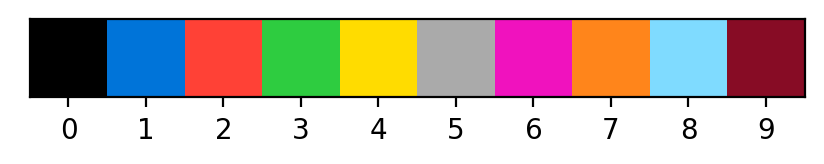

In [5]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()

In [6]:

def plot_picture(x):
    plt.imshow(np.array(x), cmap = cmap, norm = norm)
    plt.show()

In [7]:
def Defensive_Copy(A): 
    if type(A)!=list:
        A=A.tolist()
    n = len(A)
    k = len(A[0])
    L = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            L[i,j] = 0 + A[i][j]
    return L.tolist()

In [8]:
def Create(task, task_id = 0):
    n = len(task['train'])
    Input = [Defensive_Copy(task['train'][i]['input']) for i in range(n)]
    Output = [Defensive_Copy(task['train'][i]['output']) for i in range(n)]
    Input.append(Defensive_Copy(task['test'][task_id]['input']))
    return Input, Output

In [16]:
def Recolor(task):
    Input = task[0]
    Output = task[1]
    Test_Picture = Input[-1]
    Input = Input[:-1]
    N = len(Input)
    list_lenc=[]

    for x, y in zip(Input, Output):
        if len(x) != len(y) or len(x[0]) != len(y[0]):
            return -1
        lenc=len(np.unique(np.array(y)))
        list_lenc.append(lenc)
    Best_Dict = -1
    Best_Q1 = -1
    Best_Q2 = -1
    Best_v = -1
    # v ranges from 0 to 3. This gives an extra flexibility of measuring distance from any of the 4 corners
    Pairs = []
    for t in range(15):
        for Q1 in range(1,8):
            for Q2 in range(1,8):
                if Q1+Q2 == t:
                    Pairs.append((Q1,Q2))
    Pairs.append((15,15))
    Pairs.append((30,30))
                    
    for Q1, Q2 in Pairs:
        for v in range(4):
    
  
            if Best_Dict != -1:
                continue
            possible = True
            Dict = {}
                      
            for x, y in zip(Input, Output):
                n = len(x)
                k = len(x[0])
                for i in range(n):
                    for j in range(k):
                        if v == 0 or v ==2:
                            p1 = i%Q1
                        else:
                            p1 = (n-1-i)%Q1
                        if v == 0 or v ==3:
                            p2 = j%Q2
                        else :
                            p2 = (k-1-j)%Q2
                        color1 = x[i][j]
                        color2 = y[i][j]
                        if color1 != color2:
                            rule = (p1, p2, color1)
                            
                            if rule not in Dict:
                                Dict[rule] = color2
                            elif Dict[rule] != color2:
                                possible = False
            #print(Dict)
            if possible:
                
                # Let's see if we actually solve the problem
                for x, y in zip(Input, Output):
                    n = len(x)
                    k = len(x[0])
                    for i in range(n):
                        for j in range(k):
                            if v == 0 or v ==2:
                                p1 = i%Q1
                            else:
                                p1 = (n-1-i)%Q1
                            if v == 0 or v ==3:
                                p2 = j%Q2
                            else :
                                p2 = (k-1-j)%Q2
                           
                            color1 = x[i][j]
                            rule = (p1,p2,color1)
                            
                            if rule in Dict:
                                color2 = 0 + Dict[rule]
                            else:
                                color2 = 0 + y[i][j]
                            if color2 != y[i][j]:
                                possible = False 
                            
                if possible:
                    
                    Best_Dict = Dict
                    Best_Q1 = Q1
                    Best_Q2 = Q2
                    Best_v = v
                    
            
                
    
    if Best_Dict == -1:
        return -1 #meaning that we didn't find a rule that works for the traning cases
    
    #Otherwise there is a rule: so let's use it:
    n = len(Test_Picture)
    k = len(Test_Picture[0])
    
    answer = np.zeros((n,k), dtype = int)
    
    for i in range(n):
        for j in range(k):
            if Best_v == 0 or Best_v ==2:
                p1 = i%Best_Q1
            else:
                p1 = (n-1-i)%Best_Q1
            if Best_v == 0 or Best_v ==3:
                p2 = j%Best_Q2
            else :
                p2 = (k-1-j)%Best_Q2
           
            color1 = Test_Picture[i][j]
            rule = (p1, p2, color1)
            if (p1, p2, color1) in Best_Dict:
                answer[i][j] = 0 + Best_Dict[rule]
            else:
                answer[i][j] = 0 + color1
                                    
            #print(answer)
    #print(list_lenc)
    if len(np.unique(list_lenc))==1:
        #print(answer)
        if len(np.unique(answer))==list_lenc[0]:
            return answer.tolist()
        else:
            return -1
            
    return answer.tolist()

In [17]:
Function = Recolor

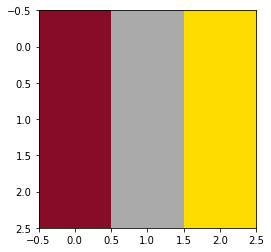

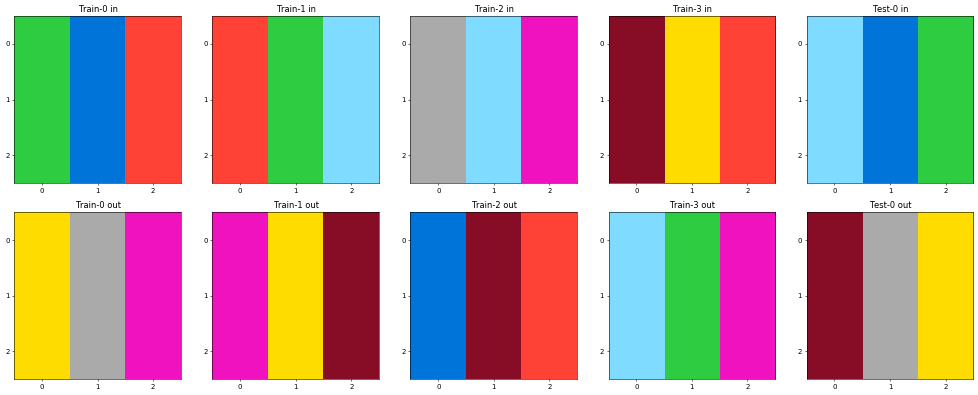

15


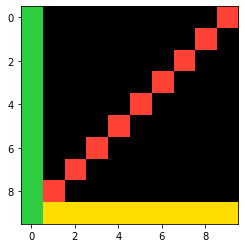

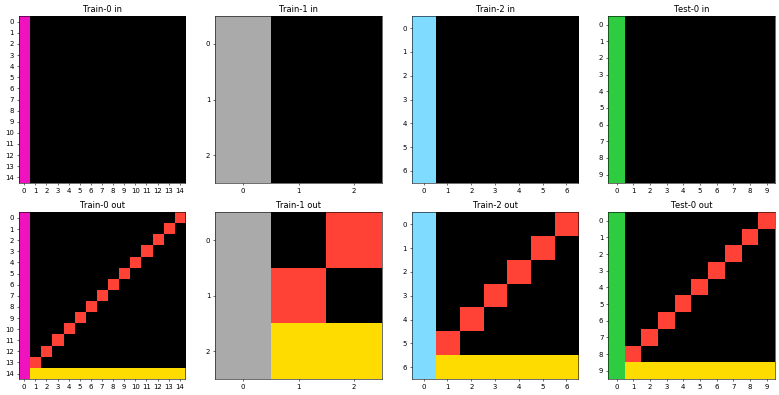

83


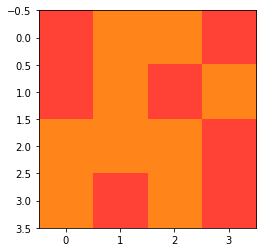

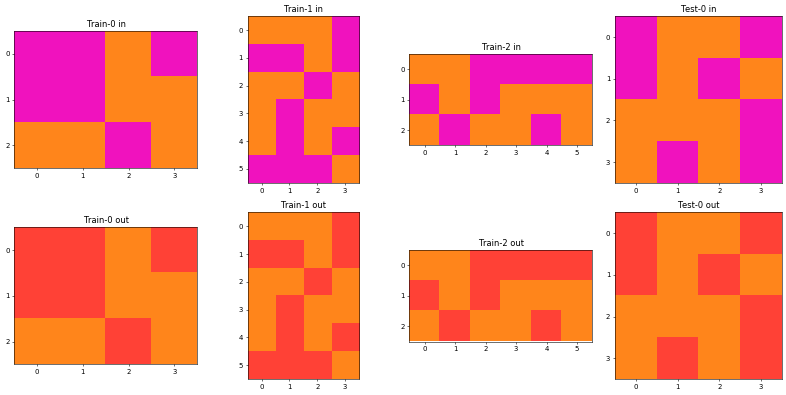

275


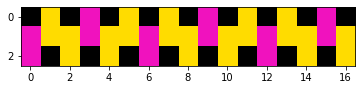

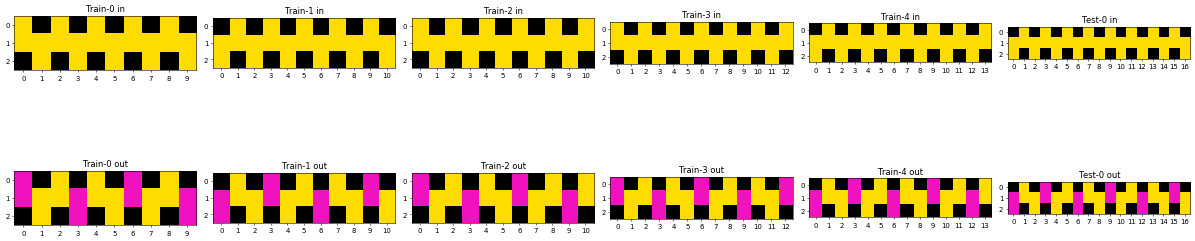

291


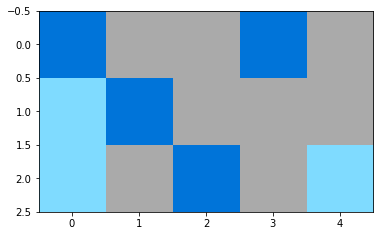

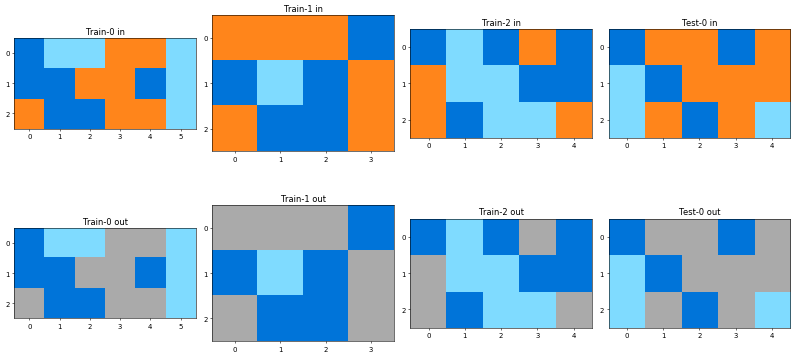

308


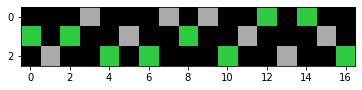

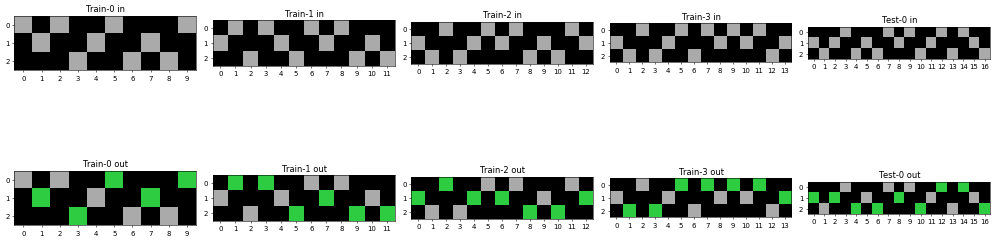

331


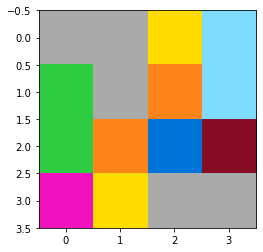

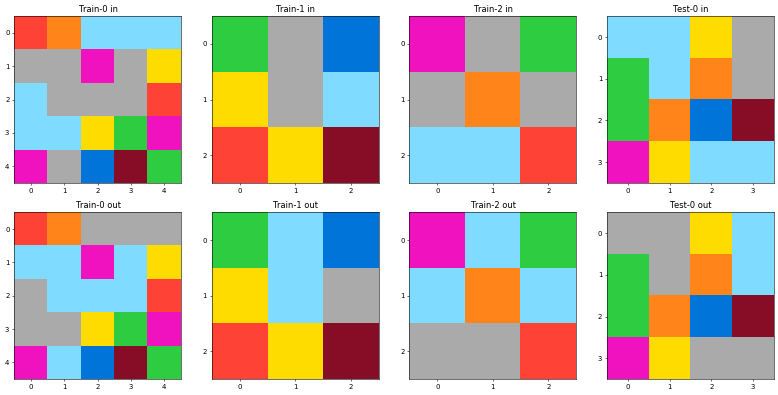

336


In [18]:
training_examples = []
for i in range(400):
    task = Trains[i]
    basic_task = Create(task,0)
    a = Function(basic_task)
  
    if  a != -1 and task['test'][0]['output'] == a:
    #if  a != -1 :
        plot_picture(a)
        plot_task(task)
        print(i)
        training_examples.append(i)      

In [19]:
print(len(training_examples))
print(training_examples)

7
[15, 83, 275, 291, 308, 331, 336]


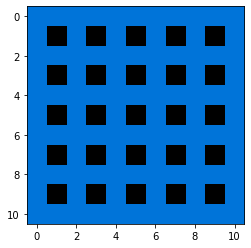

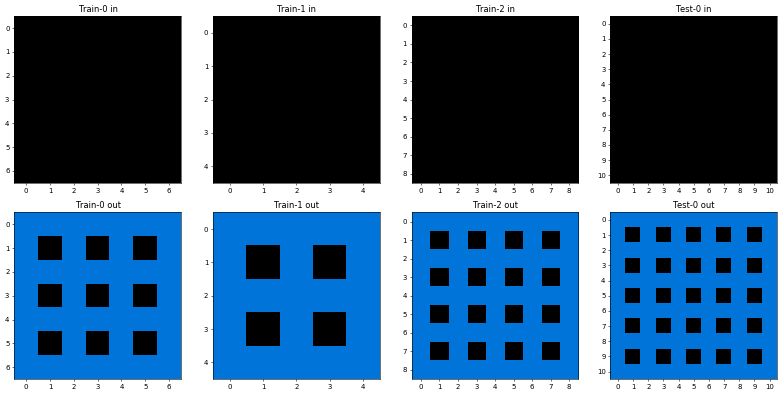

82


In [20]:
evaluation_examples = []


for i in range(400):
    task = Evals[i]
    basic_task = Create(task,0)
    a = Function(basic_task)
    
    if a != -1 and task['test'][0]['output'] == a:
       
        plot_picture(a)
        plot_task(task)
        print(i)
        evaluation_examples.append(i)        

In [21]:
print(len(evaluation_examples))
print(evaluation_examples)

1
[82]


In [31]:
# submission = pd.read_csv(data_path/ 'sample_submission.csv')
# submission.head()

,output_id,output
0,00576224_0,|32|78| |32|78| |00|00|
1,009d5c81_0,|00000000000000|00000888888888|00000800080808|...
2,00dbd492_0,|00000000000222220000|02222222220200020000|020...
3,03560426_0,|0000000000|0000000000|0000000000|0000000000|0...
4,05a7bcf2_0,|000000000020000000080000000000|00000000002220...


In [32]:
# def flattener(pred):
#     str_pred = str([row for row in pred])
#     str_pred = str_pred.replace(', ', '')
#     str_pred = str_pred.replace('[[', '|')
#     str_pred = str_pred.replace('][', '|')
#     str_pred = str_pred.replace(']]', '|')
#     return str_pred

In [33]:
# example_grid = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
# display(example_grid)
# print(flattener(example_grid))

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

|123|456|789|


In [22]:
# Solved = []
# Problems = submission['output_id'].values
# Proposed_Answers = []
# for i in  range(len(Problems)):
#     output_id = Problems[i]
#     task_id = output_id.split('_')[0]
#     pair_id = int(output_id.split('_')[1])
#     f = str(test_path / str(task_id + '.json'))
   
#     with open(f, 'r') as read_file:
#         task = json.load(read_file)
    
#     n = len(task['train'])
#     Input = [Defensive_Copy(task['train'][j]['input']) for j in range(n)]
#     Output = [Defensive_Copy(task['train'][j]['output']) for j in range(n)]
#     Input.append(Defensive_Copy(task['test'][pair_id]['input']))
    
#     solution = Recolor([Input, Output])
   
    
#     pred = ''
        
#     if solution != -1:
#         Solved.append(i)
#         pred1 = flattener(solution)
#         pred = pred+pred1+' '
        
#     if pred == '':
#         pred = flattener(example_grid)
        
#     Proposed_Answers.append(pred)
    
# submission['output'] = Proposed_Answers
# submission.to_csv('submission.csv', index = False)

In [125]:
# Solved = []
# Problems = submission['output_id'].values
# Proposed_Answers = []
# for i in  range(len(Problems)):
#     output_id = Problems[i]
#     task_id = output_id.split('_')[0]
#     pair_id = int(output_id.split('_')[1])
#     f = str(test_path / str(task_id + '.json'))
   
#     with open(f, 'r') as read_file:
#         task = json.load(read_file)
    
#     n = len(task['train'])
#     Input = [Defensive_Copy(task['train'][j]['input']) for j in range(n)]
#     Output = [Defensive_Copy(task['train'][j]['output']) for j in range(n)]
#     Input.append(Defensive_Copy(task['test'][pair_id]['input']))
    
#     solution = Recolor([Input, Output])
   
    
#     pred = ''
        
#     if solution != -1:
#         Solved.append(i)
#         pred1 = flattener(solution)
#         pred = pred+pred1+' '
        
#     if pred == '':
#         pred = flattener(example_grid)
        
#     Proposed_Answers.append(pred)
    
# submission['output'] = Proposed_Answers
# submission.to_csv('submission.csv', index = False)

In [126]:
# print(Solved)

[33, 52, 85, 101]


In [25]:
# submission2 = pd.read_csv('submission.csv')
# submission2.head(50)

,output_id,output
0,00576224_0,|123|456|789|
1,009d5c81_0,|123|456|789|
2,00dbd492_0,|123|456|789|
3,03560426_0,|123|456|789|
4,05a7bcf2_0,|123|456|789|
5,0607ce86_0,|123|456|789|
6,0692e18c_0,|123|456|789|
7,070dd51e_0,|123|456|789|
8,08573cc6_0,|123|456|789|
9,0934a4d8_0,|123|456|789|


In [142]:
.
.
.
.

.
直接用test做
def Recolor_delc(task,del_c):
    Input = task[0]
    Output = task[1]
    Test_Picture = Input[-1]
    Input = Input[:-1]
    N = len(Input)
    
    for x, y in zip(Input, Output):
        if len(x) != len(y) or len(x[0]) != len(y[0]):
            return -1

    Best_Dict = -1
    Best_Q1 = -1
    Best_Q2 = -1
    Best_v = -1
    # v ranges from 0 to 3. This gives an extra flexibility of measuring distance from any of the 4 corners
    Pairs = []
    for t in range(15):
        for Q1 in range(1,8):
            for Q2 in range(1,8):
                if Q1+Q2 == t:
                    Pairs.append((Q1,Q2))
                    Pairs.append((15,15))
                    Pairs.append((30,30))
                
                    
    for Q1, Q2 in Pairs:
        for v in range(4):
    
  
            if Best_Dict != -1:
                continue
            possible = True
            Dict = {}
                      
            for x, y in zip(Input, Output):
                n = len(x)
                k = len(x[0])
                x1=zeros(n,k)
                for i in range(n):
                    for j in range(k):
                        if v == 0 or v ==2:
                            p1 = i%Q1
                        else:
                            p1 = (n-1-i)%Q1
                        if v == 0 or v ==3:
                            p2 = j%Q2
                        else :
                            p2 = (k-1-j)%Q2
                        color1 = x[i][j]
                        color2 = x1[i][j]
                        if color1 != del_c:
                            rule = (p1, p2)
                            
                            if rule not in Dict:
                                Dict[rule] = color1
                            elif Dict[rule] != color1:
                                possible = False
            #print(Dict)
            if possible:
                
                # Let's see if we actually solve the problem
                for x, y in zip(Input, Output):
                    n = len(x)
                    k = len(x[0])
                    for i in range(n):
                        for j in range(k):
                            if v == 0 or v ==2:
                                p1 = i%Q1
                            else:
                                p1 = (n-1-i)%Q1
                            if v == 0 or v ==3:
                                p2 = j%Q2
                            else :
                                p2 = (k-1-j)%Q2
                           
                            color1 = x[i][j]
                            rule = (p1,p2)
                            
                            if rule in Dict:
                                color2 = 0 + Dict[rule]
                            else:
                                color2 = 0 + y[i][j]
                            if color2 == del_c:
                                possible = False 
                            
                if possible:
                    print(Best_Dict)
                    
                    Best_Dict = Dict
                    Best_Q1 = Q1
                    Best_Q2 = Q2
                    Best_v = v
                    
            
                
    print(Best_Dict)
    if Best_Dict == -1:
        return -1 #meaning that we didn't find a rule that works for the traning cases
    
    #Otherwise there is a rule: so let's use it:
    n = len(Test_Picture)
    k = len(Test_Picture[0])
    
    answer = np.zeros((n,k), dtype = int)
    
    for i in range(n):
        for j in range(k):
            if Best_v == 0 or Best_v ==2:
                p1 = i%Best_Q1
            else:
                p1 = (n-1-i)%Best_Q1
            if Best_v == 0 or Best_v ==3:
                p2 = j%Best_Q2
            else :
                p2 = (k-1-j)%Best_Q2
           
            color1 = Test_Picture[i][j]
            rule = (p1, p2, color1)
            if (p1, p2, color1) in Best_Dict:
                answer[i][j] = 0 + Best_Dict[rule]
            else:
                answer[i][j] = 0 + color1
                                    
            #print(answer)
    #print(list_lenc)

            
    return answer.tolist()

In [143]:
training_examples = []
for i in range(60,61):
    task = Trains[i]
    basic_task = Create(task,0)
    a = Recolor_delc(basic_task,0)
  
    if  a != -1 and task['test'][0]['output'] == a:
    #if  a != -1 :
        plot_picture(a)
        plot_task(task)
        print(i)
        training_examples.append(i)      

-1
